'''
Za mtcars skup podataka (nalazi se rusu_lv_2019_20/LV3/resources) napišite programski kod koji će 
odgovoriti na sljedeća pitanja: 
1. Kojih 5 automobila ima najveću potrošnju? (koristite funkciju sort) 
2. Koja tri automobila s 8 cilindara imaju najmanju potrošnju? 
3. Kolika je srednja potrošnja automobila sa 6 cilindara? 
4. Kolika je srednja potrošnja automobila s 4 cilindra mase između 2000 i 2200 lbs? 
5. Koliko je automobila s ručnim, a koliko s automatskim mjenjačem u ovom skupu podataka? 
6. Koliko je automobila s automatskim mjenjačem i snagom preko 100 konjskih snaga? 
7. Kolika je masa svakog automobila u kilogramima?
'''


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

cars = pd.read_csv('/content/sample_data/mtcars.csv')
print('\nCar data:\n', cars)


Car data:
                     car   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07

In [15]:
#Kojih 5 automobila ima najveću potrošnju? (koristite funkciju sort) 
mpg = cars.sort_values(by=['mpg'],ascending=True)
five_highest_comsumption = mpg.head(5)
print('\n\nTop 5 fuel consumption cars:')
print(five_highest_comsumption[['car', 'mpg']])

#Koja tri automobila s 8 cilindara imaju najmanju potrošnju? 
eight_cyl_lowest_consumption = cars[cars.cyl == 8]
eight_cyl_lowest_consumption = eight_cyl_lowest_consumption.sort_values(by=['mpg'],ascending=True)
three_lowest_mpg_8cyl = eight_cyl_lowest_consumption.tail(3)
print('\n\nBottom 3 fuel consumption cars with 8 cyl:')
print(three_lowest_mpg_8cyl[['car', 'mpg', 'cyl']])

#Kolika je srednja potrošnja automobila sa 6 cilindara?
six_cyl = cars[cars.cyl==6]
print('\n\nSix cyl cars:\n', six_cyl[['car', 'mpg', 'cyl']])
print('\n\nAverage fuel consumption in 6 cyl cars:')
avg_mpg_6cyl = six_cyl['mpg'].mean()
print(avg_mpg_6cyl.round(2),'mpg')

#Kolika je srednja potrošnja automobila s 4 cilindra mase između 2000 i 2200 lbs?
four_cyl = cars[cars.cyl == 4]
req_weight = four_cyl[(four_cyl.wt <= 2.2) & (four_cyl.wt >= 2.0)]
print('\n\nFour cyl cars with weight between 2000lbs and 2200lbs:')
print(req_weight[['car', 'mpg', 'cyl', 'wt']])
print('\n\nAverage fuel consumption in 4 cyl cars with weight between 2000lbs and 2200lbs:')
avg_four_cyl_mpg = req_weight['mpg'].mean()
print(avg_four_cyl_mpg, 'mpg')

#Koliko je automobila s ručnim, a koliko s automatskim mjenjačem u ovom skupu podataka?
automatic = cars[cars.am == 1]
print('\n\nNumber of automatic transmission cars: ', automatic['car'].count())
manual = cars[cars.am == 1]
print('Number of manual transmission cars: ', manual['car'].count())

#Koliko je automobila s automatskim mjenjačem i snagom preko 100 konjskih snaga? 
hp_automatic = automatic[automatic.hp > 100]
print('\n\nNumber of automatic transmission cars with over 100 hp: ', hp_automatic['car'].count())

#Kolika je masa svakog automobila u kilogramima?
lbs_cars = list(cars['wt'])
kg_cars = list()

for weight in lbs_cars:
    kg_cars.append(weight*0.45359237)  

kg_df = pd.DataFrame({'car':cars['car'], 'weight(kg)':kg_cars})
print('\n\nWeight in lbs and kg:\n', kg_df)




Top 5 fuel consumption cars:
                    car   mpg
15  Lincoln Continental  10.4
14   Cadillac Fleetwood  10.4
23           Camaro Z28  13.3
6            Duster 360  14.3
16    Chrysler Imperial  14.7


Bottom 3 fuel consumption cars with 8 cyl:
                  car   mpg  cyl
12         Merc 450SL  17.3    8
4   Hornet Sportabout  18.7    8
24   Pontiac Firebird  19.2    8


Six cyl cars:
                car   mpg  cyl
0        Mazda RX4  21.0    6
1    Mazda RX4 Wag  21.0    6
3   Hornet 4 Drive  21.4    6
5          Valiant  18.1    6
9         Merc 280  19.2    6
10       Merc 280C  17.8    6
29    Ferrari Dino  19.7    6


Average fuel consumption in 6 cyl cars:
19.74 mpg


Four cyl cars with weight between 2000lbs and 2200lbs:
              car   mpg  cyl    wt
17       Fiat 128  32.4    4  2.20
26  Porsche 914-2  26.0    4  2.14


Average fuel consumption in 4 cyl cars with weight between 2000lbs and 2200lbs:
29.2 mpg


Number of automatic transmission cars:  13
Numbe

Napišite programski kod koji će iscrtati sljedeće slike za mtcars skup podataka:
1. Pomoću barplot-a prikažite na istoj slici potrošnju automobila s 4, 6 i 8 cilindara.
2. Pomoću boxplot-a prikažite na istoj slici distribuciju težine automobila s 4, 6 i 8 cilindara.
3. Pomoću odgovarajućeg grafa pokušajte odgovoriti na pitanje imaju li automobili s ručnim mjenjačem veću
potrošnju od automobila s automatskim mjenjačem?
4. Prikažite na istoj slici odnos ubrzanja i snage automobila za automobile s ručnim odnosno automatskim
mjenjačem.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pylab


# barplot avg mpg
four_cyl = cars[cars.cyl == 4]
six_cyl = cars[cars.cyl == 6]
eight_cyl = cars[cars.cyl == 8]

avg_mpg_four_cyl = four_cyl['mpg'].mean()
avg_mpg_six_cyl = six_cyl['mpg'].mean()
avg_mpg_eight_cyl = eight_cyl['mpg'].mean()

avg_mpg_df = pd.DataFrame({'engine cylinder':['4 cyl', '6 cyl', '8 cyl'],
    'avg mpg':[avg_mpg_four_cyl, avg_mpg_six_cyl, avg_mpg_eight_cyl]})

avg_mpg_df.plot.bar(x='engine cylinder', y='avg mpg', rot=0, color='DarkGreen')


# weight distribution in cyl dependency
wt_4_cyl = list(four_cyl.wt)
wt_6_cyl = list(six_cyl.wt)
wt_8_cyl = list(eight_cyl.wt)

wt_list = wt_4_cyl + wt_6_cyl + wt_8_cyl
engine_cyl_id = list()

for i in wt_4_cyl:
    engine_cyl_id.append('4 cyl')
for i in wt_6_cyl:
    engine_cyl_id.append('6 cyl')
for i in wt_8_cyl:
    engine_cyl_id.append('8 cyl')

wt_df = pd.DataFrame({'engine cylinder':engine_cyl_id, 
    'weight':wt_list})

color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

wt_df.plot.box(by='engine cylinder', color=color, sym='r+')


# avg mpg in automatic and manual cars
automatic = cars[cars.am == 0]
manual = cars[cars.am == 1]

am_id = list()
for id in range(len(automatic)):
    am_id.append('automatic')
for id in range(len(manual)):
    am_id.append('manual')

mpg_am = list(automatic.mpg) + list(manual.mpg)

mpg_df = pd.DataFrame({'transmission':am_id, 'mpg(miles per gallon)':mpg_am})
mpg_df.plot.box( by='transmission', color=color, sym='r+')


# acc and hp ratio in automatic and manual transmission cars
quarter_mile_time_automatic = list(automatic.qsec)
quarter_mile_time_manual = list(manual.qsec)

quarter_mile_meters = 400 # 1/4 mile is 400 meters 
acc_automatic = list()
acc_manual = list()

# acceleration = velocity diff/time diff --> velocity = displacement diff/time diff
for car in range(len(automatic)):
    acc_automatic.append((quarter_mile_meters/quarter_mile_time_automatic[car])/quarter_mile_time_automatic[car])
for car in range(len(manual)):
    acc_manual.append((quarter_mile_meters/quarter_mile_time_manual[car])/quarter_mile_time_manual[car])

hp_automatic = list(automatic.hp)
hp_manual = list(manual.hp)

plt.figure()

plt.subplot(2, 1, 1)
plt.scatter(hp_automatic, acc_automatic)
plt.title('Automatic cars')
plt.xlabel('horse power')
plt.ylabel('acceleration')

plt.subplot(2, 1, 2)
plt.scatter(hp_manual, acc_manual)
plt.title('Manual cars')
plt.xlabel('horse power')
plt.ylabel('acceleration')

plt.tight_layout()
plt.show(block=True)


Na stranici http://iszz.azo.hr/iskzl/exc.htm moguće je dohvatiti podatke o kvaliteti zraka za Republiku Hrvatsku. Podaci
se mogu preuzeti korištenjem RESTfull servisa u XML ili JSON obliku. U rusu_lv_2019_20/LV3/resources/
skriptu koja dohvaća podatke te ih pohranjuje u odgovarajući DataFrame. Prepravite/nadopunite skriptu s
programskim kodom kako bi dobili sljedeće rezultate:
1. Dohvaćanje mjerenja dnevne koncentracije lebdećih čestica PM10 za 2017. godinu za grad Osijek.
2. Ispis tri datuma u godini kada je koncentracija PM10 bila najveća.
3. Pomoću barplot prikažite ukupni broj izostalih vrijednosti tijekom svakog mjeseca.
4. Pomoću boxplot usporedite PM10 koncentraciju tijekom jednog zimskog i jednog ljetnog mjeseca.
5. Usporedbu distribucije PM10 čestica tijekom radnih dana s distribucijom čestica tijekom vikenda.


Daily PM10 concentration in Osijek, year 2017:
      vrijednost mjernaJedinica     vrijeme
0        54.542          µg/m3  2016-12-31
1        70.720          µg/m3  2017-01-01
2        29.707          µg/m3  2017-01-02
3        31.021          µg/m3  2017-01-03
4        23.034          µg/m3  2017-01-04
..          ...            ...         ...
349      38.957          µg/m3  2017-12-25
350      24.042          µg/m3  2017-12-26
351      12.057          µg/m3  2017-12-27
352       9.857          µg/m3  2017-12-28
353      25.487          µg/m3  2017-12-29

[354 rows x 3 columns]


Days with highest PM10 concentration:
      vrijednost mjernaJedinica     vrijeme
295       0.765          µg/m3  2017-10-22
65        5.039          µg/m3  2017-03-06
342       5.183          µg/m3  2017-12-12


PM10 conc. July 2017, Osijek:
      vrijednost mjernaJedinica     vrijeme
182      14.659          µg/m3  2017-07-01
183      19.161          µg/m3  2017-07-02
184      15.965          µg/m3  2017

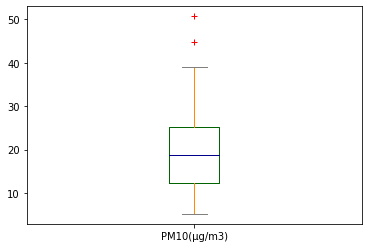

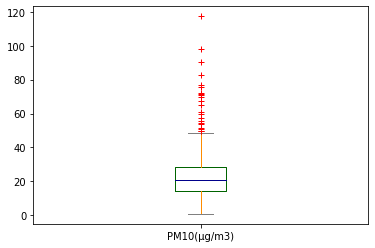

In [36]:
# daily PM10 concentration in Osijek, 2017 
import pandas as pd
from datetime import datetime
from urllib.request import urlopen
import json
import matplotlib.pyplot as plt

url = "http://iszz.azo.hr/iskzl/rs/podatak/export/json?postaja=160&polutant=5&tipPodatka=4&vrijemeOd=01.01.2017&vrijemeDo=31.12.2017"

response = urlopen(url)
data_json = json.loads(response.read())

# unix epoch time to readable time format
for item in data_json:
    item['vrijeme'] = datetime.fromtimestamp(item['vrijeme']/1000).strftime("%Y-%m-%d")
    
df = pd.DataFrame(data_json)
print('\nDaily PM10 concentration in Osijek, year 2017:\n', df)


# three days with highest PM10 concentrations in Osijek, 2017
greatest_PM10 = df.sort_values(by=['vrijednost'], ascending=True)
top_3_PM10_conc = greatest_PM10.head(3)
print('\n\nDays with highest PM10 concentration:\n', top_3_PM10_conc) 


# december and july PM10 conc. comparison
july_start = datetime(2017, 7, 1).strftime('%Y-%m-%d')
july_end = datetime(2017, 7, 31).strftime('%Y-%m-%d')
december_start = datetime(2017, 12, 1).strftime('%Y-%m-%d')
december_end = datetime(2017, 12, 31).strftime('%Y-%m-%d')

july_PM = list()
july_df = df[(df.vrijeme >= july_start) & (df.vrijeme <= july_end)]

print('\n\nPM10 conc. July 2017, Osijek:\n', july_df)
for item in july_df['vrijednost']:
    july_PM.append(item)

december_PM = list()
december_df = df[(df.vrijeme >= december_start) & (df.vrijeme <= december_end)]

print('\n\nPM10 conc. December 2017, Osijek:\n', december_df)
for item in december_df['vrijednost']:
    december_PM.append(item)

month_list = list()
for item in july_PM:
    month_list.append('july')
for item in december_PM:
    month_list.append('december')

PM10_list = july_PM + december_PM

PM10_df = pd.DataFrame({'month':month_list, 
    'PM10(µg/m3)':PM10_list})

color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

PM10_df.plot.box( by='month', color=color, sym='r+')


# PM10 distribution during weekdays and weekends
date_list = []
for item in data_json:
    date_list.append(item['vrijeme'])

# str to datetime
datetime_list = []
for date in date_list:
    datetime_list.append(datetime.strptime(date, '%Y-%m-%d'))

# datetime to weekday
day_list = []
for day in datetime_list:
    day_list.append(day.weekday()) # 0 = Monday, ..., 6 = Sunday

weekday_weekend_list = []
for day in day_list:
    if day == 5 or day == 6:
        weekday_weekend_list.append('weekend')
    else:
        weekday_weekend_list.append('weekday')

# new pandas dataframe for weekday/weekend information
day_PM10_df = pd.DataFrame({'PM10(µg/m3)': df['vrijednost'], 'day':weekday_weekend_list})

print('\n\nWeekend/Weekday:\n', day_PM10_df)

day_PM10_df.plot.box( by='day', color=color, sym='r+')
plt.show(block=True)
